<a href="https://colab.research.google.com/github/IamDragon/FinalProjAI/blob/main/FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
hanze_url = 'https://github.com/IamDragon/FinalProjAI/raw/refs/heads/main/HANZE_events.csv'

try:
    df = pd.read_csv(hanze_url)
    print("Loaded")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Loaded


,ID,Country code,Year,Country name,Start date,End date,Type,Flood source,Regions affected (v2010),Regions affected (v2021),Area flooded,Fatalities,Persons affected,Losses (nominal value),Losses (original currency),Losses (2020 euro),Cause,Notes,References,Changes
0,2000,AL,1946,Albania,1946-10-11,1946-11-15,River,NaN,AL011;AL012;AL013;AL015;AL021;AL022;AL031;AL03...,AL011;AL012;AL013;AL015;AL021;AL022;AL031;AL03...,NaN,15.0,NaN,1.000000e+09,ALK,29746037.0,Heavy rainfall,Also landslides,UNDRR (2022),New
1,2001,AL,1953,Albania,1953-12-12,1953-12-12,Flash,NaN,AL014;AL015,AL014;AL015,NaN,5.0,NaN,8.000000e+07,ALK,2379683.0,Extreme rainfall,NaN,UNDRR (2022),New
2,2002,AL,1960,Albania,1960-11-07,1960-11-07,Flash,NaN,AL022;AL032;AL035,AL022;AL032;AL035,NaN,4.0,NaN,NaN,NaN,NaN,Extreme rainfall,NaN,UNDRR (2022),New
3,2003,AL,1962,Albania,1962-11-15,1962-11-16,River,Drin; Buna; Semani; Vjosa,AL011;AL012;AL013;AL014;AL015;AL021;AL022;AL03...,AL011;AL012;AL013;AL014;AL015;AL021;AL022;AL03...,995.0,9.0,NaN,2.000000e+09,ALK,59492073.0,Heavy rainfall,Flood impact continued into 1963; Impact area ...,UNDRR (2022); GIZ (2018); Bogdani and Selenica...,New
4,2532,AL,1968,Albania,1968-12-17,1968-12-17,Flash,NaN,AL015,AL015,15.0,0.0,NaN,NaN,NaN,NaN,Extreme rainfall,NaN,UNDRR (2022),New


In [ ]:
df2 = df.groupby(['Country code'])['Country code'].count()

df2.nlargest(10)

#print(df2)

,Country code
Country code,
IT,743
ES,304
FR,230
UK,152
DE,125
EL,109
RS,66
CH,65
AL,62


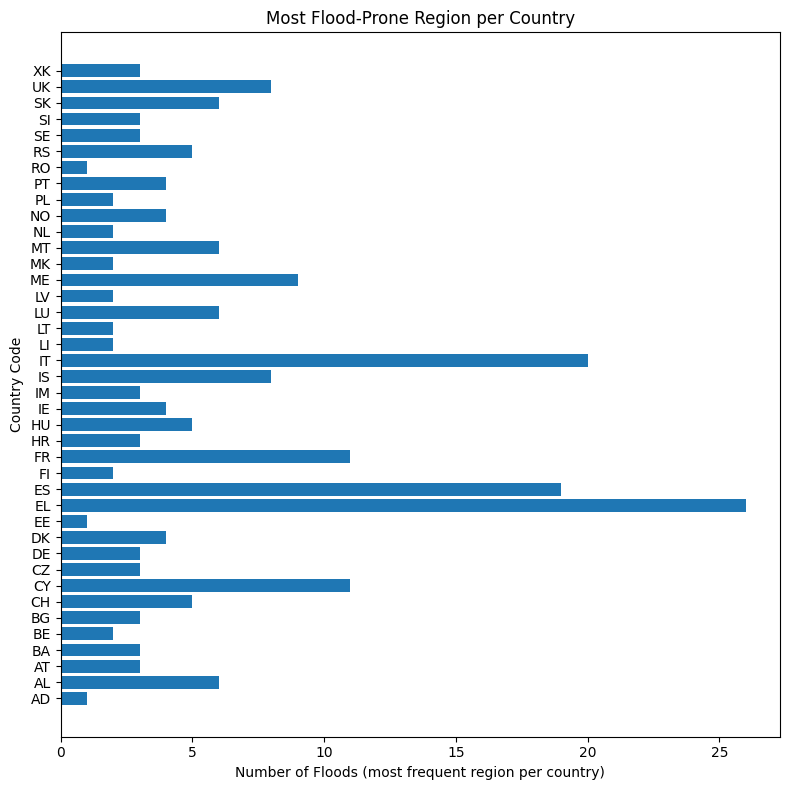

In [ ]:
most_common = (
    df.groupby("Country code")["Regions affected (v2010)"]
      .value_counts()
      .groupby(level=0)
      .head(1)
      .reset_index(name="count")
)

plt.figure(figsize=(8, 8))
plt.barh(most_common["Country code"], most_common["count"])
plt.xlabel("Number of Floods (most frequent region per country)")
plt.ylabel("Country Code")
plt.title("Most Flood-Prone Region per Country")
plt.tight_layout()
plt.show()